Notebook to get and clean the data of Le Monde about the covid19 vaccination

In [1]:
from helpers import *

In [2]:
# Clean function in order to eliminate characters like \n or \n\n after scraping
def preprocessor(text):
#     text = str(text).lower()
    
#     text = re.sub('https?://\S+|www\.\S+', '', text)
#     text = re.sub('<.*?>+', '', text)
#     text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n\n', '', text)
    text = re.sub('\'','', text)
    text = re.sub('\n', '', text)
    text = re.sub('\xa0', '', text)
    text = re.sub('\xad', '', text)
    text = re.sub('\u2009', '', text)
    text = re.sub('\ufeff', '', text)
    text = re.sub('\u200b', '', text)    
#     text = re.sub('\w*\d\w*', '', text)
    return text

# LE MONDE

In [20]:
#Install Driver
# Versión Chrome 89.0.4389.114 (Build oficial) (64 bits)
driver = webdriver.Chrome(ChromeDriverManager().install())



====== WebDriver manager ======
Current google-chrome version is 96.0.4664
Get LATEST driver version for 96.0.4664
Get LATEST driver version for 96.0.4664
Trying to download new driver from https://chromedriver.storage.googleapis.com/96.0.4664.45/chromedriver_linux64.zip
Driver has been saved in cache [/home/david/.wdm/drivers/chromedriver/linux64/96.0.4664.45]


In [21]:
search_url='https://www.lemonde.fr/recherche/?search_keywords=vaccination&start_at=19/12/1944&end_at=04/01/2022&search_sort=date_desc&page=1'

driver.get(search_url)
driver.maximize_window() 
time.sleep(1)
# Aceptar cookkies

In [5]:
# There are 169pages of vacinnes, but just 70 are from Covid: 
list_search_url =[]
list_search_url.append("https://www.lemonde.fr/recherche/?search_keywords=vaccination&start_at=19/12/1944&end_at=04/01/2022&search_sort=date_desc&page=1" )
for i in range(2, 70):
    list_search_url.append(f"https://www.lemonde.fr/recherche/?search_keywords=vaccination&start_at=19/12/1944&end_at=04/01/2022&search_sort=date_desc&page={i}")

In [13]:
list_links_le_monde=[]
for i in list_search_url: 
    driver.get(i)
    links = driver.find_elements_by_xpath('//a[@class="teaser__link"]')
    for j in links: 
        list_links_le_monde.append(j.get_attribute('href'))

In [16]:
# Store the list in a document
with open("list_links_le_monde.txt", 'w') as f:
    for s in list_links_le_monde:
        f.write(str(s) + '\n')

In [17]:
with open("list_links_le_monde.txt", 'r') as f:
    list_links_monde = [line.rstrip('\n') for line in f]
    list_links_monde= list(set(list_links_monde))
len(list_links_monde)

2760

In [22]:
def get_html_monde(list_links):
    #Count
    extracted_articles=0 
    for i in list_links: 
        driver.get(i)
        html = driver.page_source
        tail=i.split('/')[-1]
        extracted_articles += 1
        with open(f'/home/david/Escritorio/VACTINATION_PROJECT/HTMLs/LE_MONDE/{tail}.txt', 'w') as f: 
            f.write(html)
        print(f'Extracted articles: {extracted_articles} of {len(list_links)}',end='\r')
        time.sleep(1)

In [23]:
get_html_monde(list_links_monde)

In [3]:
import os
list_articles_monde=[]
for filename in os.listdir("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LE_MONDE/"):
    with open(os.path.join("/home/david/Escritorio/VACCINATION_PROJECT/HTMLs/LE_MONDE/", filename), 'r') as f:
        html_file = f.read()
    list_text=[]
    soup = BeautifulSoup(html_file, 'html.parser')
    try:
        title=soup.find("h1").text.strip()
    except: 
        title="errors"
    try:
        regex= re.compile('meta__author')
        author=soup.find("span", {"class" : regex}).text.strip()
        
    except:
        try: 
            author=soup.find(class_="article__author-identity").text.strip()
        except:       
            author = "error"
    try:
        link=soup.find('link', rel='canonical')['href']
    except: 
        link="error"
    try: 
        regex= re.compile('article__desc')
        subheadline= soup.find("p", {"class" : regex}).text.strip()
    except: 
        subheadline="error"
    try:
        date= soup.find(class_="meta__date").text.strip()
        
    except: 
        try:
            date= soup.find(class_="meta__publisher").text.strip()
        except: 
            date="error"
    try:
        regex= re.compile('article__paragraph')
        tf=soup.find_all("p", {"class" : regex})
        for p in tf:
            list_text.append(p.get_text().strip())
        text=' '.join(list_text).strip()
    except: 
        text="error"
    list_articles_monde.append({'Title': title, 
                          'Subheadline':subheadline,
                          'Text':text,
                          'Authors': author, 
                          'Date': date,
                          'Link':link}) 


In [4]:
import pandas as pd
articles_monde = pd.DataFrame.from_dict(list_articles_monde)

articles_monde

,Title,Subheadline,Text,Authors,Date,Link
0,Les habitants de l’ex-RDA séduits par le vacci...,Le vaccin russe est attendu avec confiance dan...,"Reiner Haseloff, qui briguera en juin un trois...","Par Thomas Wieder(Berlin, correspondant)",Publié le 11 mars 2021 à 04h01 - Mis à jour le...,https://www.lemonde.fr/international/article/2...
1,Vaccins contre le Covid : l’ONG Oxfam plaide p...,"L’organisation britannique estime, dans un rap...",Alors que l’idée d’une suspension temporaire d...,Par Zeliha Chaffin,Publié le 29 juillet 2021 à 07h11 - Mis à jour...,https://www.lemonde.fr/economie/article/2021/0...
2,Un confinement le week-end à Paris et Marseill...,Jean Castex doit détailler de nouvelles mesure...,Paris et Marseille ne seront finalement pas co...,Par Alexandre Lemarié,Publié le 03 mars 2021 à 21h46 - Mis à jour le...,https://www.lemonde.fr/planete/article/2021/03...
3,Covid-19 : est-il vrai qu’en Angleterre les va...,Cette affirmation s’appuie sur des chiffres ré...,"Selon les militants antivaccin, les premières ...",Par William Audureau,Publié le 01 juillet 2021 à 17h34 - Mis à jour...,https://www.lemonde.fr/les-decodeurs/article/2...
4,Covid-19 en France : une enquête ouverte après...,Le gouvernement prépare une rentrée étudiante ...,Tandis que la ministre de l’enseignement supér...,Le Monde avec AFP,Publié le 27 avril 2021 à 15h22 - Mis à jour l...,https://www.lemonde.fr/planete/article/2021/04...
...,...,...,...,...,...,...
2722,Covid-19 : le vaccin de Pfizer et BioNTech off...,La « stratégie de priorisation » déjà annoncée...,Il s’agissait de la dernière étape réglementai...,Le Monde avec AFP,Publié le 24 décembre 2020 à 11h55 - Mis à jou...,https://www.lemonde.fr/planete/article/2020/12...
2723,Covid-19 dans le monde : l’OMS prévient de l’é...,Le comité d’urgence de l’Organisation mondiale...,La pandémie due au nouveau coronavirus a fait ...,Le Monde avec AFP,Publié le 15 juillet 2021 à 06h26 - Mis à jour...,https://www.lemonde.fr/planete/article/2021/07...
2724,Covid-19 : un Conseil européen inquiet du reta...,"Le président du conseil italien, Mario Draghi,...","Un an après leur première visioconférence, les...","Par Virginie Malingre(Bruxelles, bureau européen)",Publié le 26 février 2021 à 04h34 - Mis à jour...,https://www.lemonde.fr/international/article/2...
2725,Covid-19 : nouvelles restrictions en Europe po...,"Selon l’Organisation mondiale de la santé, Omi...","De la Suède au Portugal, plusieurs pays d’Euro...",Le Monde avec AFP et Reuters,Publié le 21 décembre 2021 à 19h49 - Mis à jou...,https://www.lemonde.fr/planete/article/2021/12...


# CLEAN DATASET

In [5]:
# clean text
articles_monde['Text']=articles_monde['Text'].apply(preprocessor)
articles_monde['Title']=articles_monde['Title'].apply(preprocessor)

In [6]:
articles_monde['Newspaper']= 'Le Monde'
articles_monde['Country']= 'France'
articles_monde['n_words'] = articles_monde.Text.apply(lambda x: len(str(x).split(' ')))

In [7]:
articles_monde

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
0,Les habitants de l’ex-RDA séduits par le vacci...,Le vaccin russe est attendu avec confiance dan...,"Reiner Haseloff, qui briguera en juin un trois...","Par Thomas Wieder(Berlin, correspondant)",Publié le 11 mars 2021 à 04h01 - Mis à jour le...,https://www.lemonde.fr/international/article/2...,Le Monde,France,917
1,Vaccins contre le Covid: l’ONG Oxfam plaide po...,"L’organisation britannique estime, dans un rap...",Alors que l’idée d’une suspension temporaire d...,Par Zeliha Chaffin,Publié le 29 juillet 2021 à 07h11 - Mis à jour...,https://www.lemonde.fr/economie/article/2021/0...,Le Monde,France,362
2,Un confinement le week-end à Paris et Marseill...,Jean Castex doit détailler de nouvelles mesure...,Paris et Marseille ne seront finalement pas co...,Par Alexandre Lemarié,Publié le 03 mars 2021 à 21h46 - Mis à jour le...,https://www.lemonde.fr/planete/article/2021/03...,Le Monde,France,870
3,Covid-19 : est-il vrai qu’en Angleterre les va...,Cette affirmation s’appuie sur des chiffres ré...,"Selon les militants antivaccin, les premières ...",Par William Audureau,Publié le 01 juillet 2021 à 17h34 - Mis à jour...,https://www.lemonde.fr/les-decodeurs/article/2...,Le Monde,France,467
4,Covid-19 en France: une enquête ouverte après ...,Le gouvernement prépare une rentrée étudiante ...,Tandis que la ministre de l’enseignement supér...,Le Monde avec AFP,Publié le 27 avril 2021 à 15h22 - Mis à jour l...,https://www.lemonde.fr/planete/article/2021/04...,Le Monde,France,859
...,...,...,...,...,...,...,...,...,...
2722,Covid-19 : le vaccin de Pfizer et BioNTech off...,La « stratégie de priorisation » déjà annoncée...,Il s’agissait de la dernière étape réglementai...,Le Monde avec AFP,Publié le 24 décembre 2020 à 11h55 - Mis à jou...,https://www.lemonde.fr/planete/article/2020/12...,Le Monde,France,539
2723,Covid-19 dans le monde: l’OMS prévient de l’ém...,Le comité d’urgence de l’Organisation mondiale...,La pandémie due au nouveau coronavirus a fait ...,Le Monde avec AFP,Publié le 15 juillet 2021 à 06h26 - Mis à jour...,https://www.lemonde.fr/planete/article/2021/07...,Le Monde,France,1342
2724,Covid-19 : un Conseil européen inquiet du reta...,"Le président du conseil italien, Mario Draghi,...","Un an après leur première visioconférence, les...","Par Virginie Malingre(Bruxelles, bureau européen)",Publié le 26 février 2021 à 04h34 - Mis à jour...,https://www.lemonde.fr/international/article/2...,Le Monde,France,1044
2725,Covid-19: nouvelles restrictions en Europe pou...,"Selon l’Organisation mondiale de la santé, Omi...","De la Suède au Portugal, plusieurs pays d’Euro...",Le Monde avec AFP et Reuters,Publié le 21 décembre 2021 à 19h49 - Mis à jou...,https://www.lemonde.fr/planete/article/2021/12...,Le Monde,France,790


In [8]:
#Date
articles_monde['Date'] = articles_monde['Date'].str.split("Publié le ").str[1]
articles_monde['Date'] = articles_monde['Date'].str.split("-").str[0]
for index,row in articles_monde.iterrows(): 
    try:
        articles_monde['Date'][index] =dateparser.parse(row.Date).date()
    except: 
        continue
# articles_monde['Date'] = pd.to_datetime(articles_monde['Date'])

/home/david/anaconda3/lib/python3.9/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
/tmp/ipykernel_154857/1298787915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  articles_monde['Date'][index] =dateparser.parse(row.Date).date()


In [9]:
articles_monde['Date'] = pd.to_datetime(articles_monde['Date'],errors='coerce')

In [10]:
articles_monde=articles_monde.drop_duplicates()
articles_monde=articles_monde[articles_monde.Text.str.contains("vacc")|articles_monde.Subheadline.str.contains("vacc")|articles_monde.Title.str.contains("vacc")]

In [11]:
#Eliminate before 2020
articles_monde=articles_monde[articles_monde['Date']>'2020-01-01']
articles_monde.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
2220,"Thomas Sankara, le patriote","« Thomas Sankara, l’immortel » (2/5). Le capit...",«Comment voulez-vous être fier de votre pays q...,"Par Pierre Lepidi(Ouagadougou, envoyé spécial)",2020-01-02,https://www.lemonde.fr/afrique/article/2020/01...,Le Monde,France,1327
271,"En RDC, «la pire épidémie de rougeole au monde...",L’Organisation mondiale de la santé demande 40...,L’épidémie de rougeole qui sévit en République...,Le Monde avec AFP,2020-01-08,https://www.lemonde.fr/afrique/article/2020/01...,Le Monde,France,261
725,Coronaviruschinois : la quarantaine est-elle u...,"Utilisée depuis le XIVe siècle, elle permet de...","Des rues désertes, le son des haut-parleurs in...",Le Monde avec AFP,2020-01-28,https://www.lemonde.fr/planete/article/2020/01...,Le Monde,France,777
602,La grippe saisonnière a déjà fait 22morts enFr...,D’après l’agence sanitaire Santé publique Fran...,Loin de la lumière médiatique autour du nouvea...,Le Monde avec AFP,2020-01-30,https://www.lemonde.fr/societe/article/2020/01...,Le Monde,France,391
1313,"A la Fondation Cartier, les photographies de C...",L’exposition parisienne montre la richesse de ...,"A la Fondation Cartier, à Paris, les images fl...",Par Claire Guillot,2020-02-03,https://www.lemonde.fr/culture/article/2020/02...,Le Monde,France,826
...,...,...,...,...,...,...,...,...,...
1332,Covid-19 en France: la pression hospitalière r...,"Cette réunion, prévue lundi après-midi, interv...","Le premier ministre, Jean Castex, réunira, lun...",Le Monde avec AFP,2022-01-02,https://www.lemonde.fr/planete/article/2022/01...,Le Monde,France,550
2116,Covid-19: la période d’isolement réduite à sep...,"A partir de lundi, les cas contacts disposant ...",La décision était attendue. Les règles d’isole...,Le Monde avec AFP et Reuters,2022-01-02,https://www.lemonde.fr/planete/article/2022/01...,Le Monde,France,943
1169,Covid-19: les périls et les espoirs de l’an III,"L’année 2022 a commencé comme 2021, sous le si...",Editorial du «Monde». On pouvait rêver meilleu...,Le Monde,2022-01-03,https://www.lemonde.fr/idees/article/2022/01/0...,Le Monde,France,543
1267,L’espoir d’une solution contre la mortalité ma...,"A La Tremblade et à Montpellier, des chercheur...","Contre toute attente, les huîtres ont de la mé...","Par Frédéric Zabalza(La Rochelle, correspondant)",2022-01-03,https://www.lemonde.fr/planete/article/2022/01...,Le Monde,France,723


In [12]:
articles_monde.to_csv(r'/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_monde_05_01_2022_premium.csv', index = False)

In [13]:
df = pd.read_csv('/home/david/Escritorio/VACCINATION_PROJECT/DF_HTML_VERSION/articles_monde_05_01_2022_premium.csv')

In [14]:
df.sort_values('Date')

,Title,Subheadline,Text,Authors,Date,Link,Newspaper,Country,n_words
2114,"Thomas Sankara, le patriote","« Thomas Sankara, l’immortel » (2/5). Le capit...",«Comment voulez-vous être fier de votre pays q...,"Par Pierre Lepidi(Ouagadougou, envoyé spécial)",2020-01-02,https://www.lemonde.fr/afrique/article/2020/01...,Le Monde,France,1327
253,"En RDC, «la pire épidémie de rougeole au monde...",L’Organisation mondiale de la santé demande 40...,L’épidémie de rougeole qui sévit en République...,Le Monde avec AFP,2020-01-08,https://www.lemonde.fr/afrique/article/2020/01...,Le Monde,France,261
688,Coronaviruschinois : la quarantaine est-elle u...,"Utilisée depuis le XIVe siècle, elle permet de...","Des rues désertes, le son des haut-parleurs in...",Le Monde avec AFP,2020-01-28,https://www.lemonde.fr/planete/article/2020/01...,Le Monde,France,777
569,La grippe saisonnière a déjà fait 22morts enFr...,D’après l’agence sanitaire Santé publique Fran...,Loin de la lumière médiatique autour du nouvea...,Le Monde avec AFP,2020-01-30,https://www.lemonde.fr/societe/article/2020/01...,Le Monde,France,391
1245,"A la Fondation Cartier, les photographies de C...",L’exposition parisienne montre la richesse de ...,"A la Fondation Cartier, à Paris, les images fl...",Par Claire Guillot,2020-02-03,https://www.lemonde.fr/culture/article/2020/02...,Le Monde,France,826
...,...,...,...,...,...,...,...,...,...
1264,Covid-19 en France: la pression hospitalière r...,"Cette réunion, prévue lundi après-midi, interv...","Le premier ministre, Jean Castex, réunira, lun...",Le Monde avec AFP,2022-01-02,https://www.lemonde.fr/planete/article/2022/01...,Le Monde,France,550
2012,Covid-19: la période d’isolement réduite à sep...,"A partir de lundi, les cas contacts disposant ...",La décision était attendue. Les règles d’isole...,Le Monde avec AFP et Reuters,2022-01-02,https://www.lemonde.fr/planete/article/2022/01...,Le Monde,France,943
1108,Covid-19: les périls et les espoirs de l’an III,"L’année 2022 a commencé comme 2021, sous le si...",Editorial du «Monde». On pouvait rêver meilleu...,Le Monde,2022-01-03,https://www.lemonde.fr/idees/article/2022/01/0...,Le Monde,France,543
1202,L’espoir d’une solution contre la mortalité ma...,"A La Tremblade et à Montpellier, des chercheur...","Contre toute attente, les huîtres ont de la mé...","Par Frédéric Zabalza(La Rochelle, correspondant)",2022-01-03,https://www.lemonde.fr/planete/article/2022/01...,Le Monde,France,723


## NER

In [77]:
df_ner= ner(df.Text,"fr_core_news_sm")

In [78]:
df_ner=df_ner.groupby(['Entity','Label']).size().reset_index(name='Frequency')

In [81]:
#Eliminate wrong entitites
list_wrong_entities=['l’', 'n’','L’','c’','C’','l’','–','jusqu’','Retrouvez']
df_ner=df_ner[~df_ner.Entity.isin(list_wrong_entities)]

Text(0.5, 1.0, 'Most frequent NE PERSON')

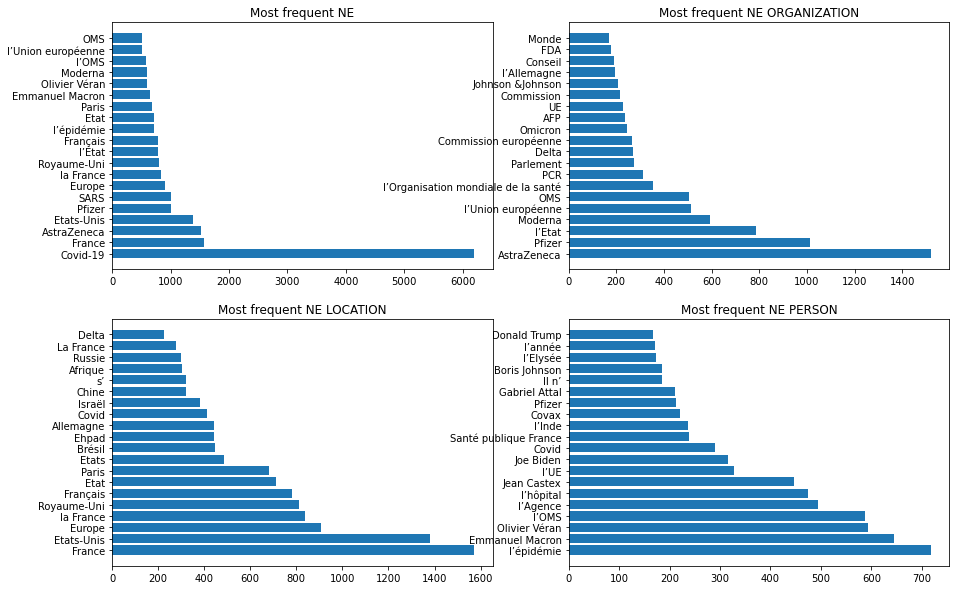

In [84]:
fig, axs = plt.subplots(2, 2,figsize=(15,10))
axs[0, 0].barh(y=df_ner.sort_values('Frequency',ascending=False).head(20)['Entity'],width=df_ner.sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,0].set_title('Most frequent NE')
axs[0, 1].barh(y=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="ORG"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[0,1].set_title('Most frequent NE ORGANIZATION')
axs[1, 0].barh(y=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="LOC"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,0].set_title('Most frequent NE LOCATION')
axs[1, 1].barh(y=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Entity'], width=df_ner[df_ner['Label']=="PER"].sort_values('Frequency',ascending=False).head(20)['Frequency'])
axs[1,1].set_title('Most frequent NE PERSON')